# DTrees

In [13]:
import numpy as np
from helpers.MathFunctions import mode

class DTree:
    class DNode:
        def __init__(self, X, y, remaining_features):
            self.left = None
            self.right = None
            self.X = X
            self.y = y
            self.remaining_features = remaining_features
            self.train()
            
        def train(self):
            if len(self.remaining_features) == 0 or len(self.y) == 0:
                return
            X_left, X_right, y_left, y_right, remaining_features = self._find_best_split()
            self.left = DTree.DNode(X_left, y_left, remaining_features)
            self.right = DTree.DNode(X_right, y_right, remaining_features)
            
        def _find_best_split(self):
            lowest_cost = None
            best_split = None
            for i in self.remaining_features:
                unique_values = np.sort(self.X[:,i])
                for j in range(1, unique_values.shape[0]):
                    curr_threshold = np.mean(unique_values[j-1:j+1])
                    y_left = self.y[self.X[:, i] <= curr_threshold]
                    y_right = self.y[self.X[:, i] > curr_threshold]
                    curr_cost = self._cart_cost(y_left, y_right)
                    if lowest_cost == None or curr_cost < lowest_cost:
                        lowest_cost = curr_cost
                        best_split = (i, curr_threshold)
            self.k, self.k_threshold = best_split
            
            X_left, y_left = self.X[self.X[:, self.k] <= self.k_threshold], self.y[self.X[:, self.k] <= self.k_threshold]
            X_right, y_right = self.X[self.X[:, self.k] > self.k_threshold], self.y[self.X[:, self.k] > self.k_threshold]
            remaining_features = self.remaining_features - {self.k}
            return X_left, X_right, y_left, y_right, remaining_features
        
        def _cart_cost(self, y_left, y_right):
            m_left, m_right, m = len(y_left), len(y_right), len(self.y)
            G_left, G_right = self._impurity(y_left), self._impurity(y_right)
            return (m_left / m) * G_left + (m_right / m) * G_right
        
        def _impurity(self, y):
            squared_sum = 0
            for c in np.unique(y):
                squared_sum += (len(y[y==c]) / len(y))**2
            return 1 - squared_sum
        
        
    def __init__(self):
        pass
    
    def __call__(self, instances):
        return self.predict(instances)
    
    def fit(self, X, y):
        remaining_features = set(range(X.shape[1]))
        self.root = self.DNode(X, y, remaining_features)
    
    def predict(self, instances):
        preds = []
        for instance in instances: 
            leaf = self._find_leaf(instance)
            pred = mode(leaf.y)
            preds.append(pred)
        return np.array(preds)
    
    def _find_leaf(self, instance):
        curr_node = self.root
        while curr_node.left != None and curr_node.right != None:
            if instance[curr_node.k] <= curr_node.k_threshold:
                next_node = curr_node.left
            else:
                next_node = curr_node.right
            curr_node = next_node
        return curr_node

## DTree Classifier

In [14]:
from helpers.GetDatasets import classification_split
X_train, X_test, y_train, y_test = classification_split()

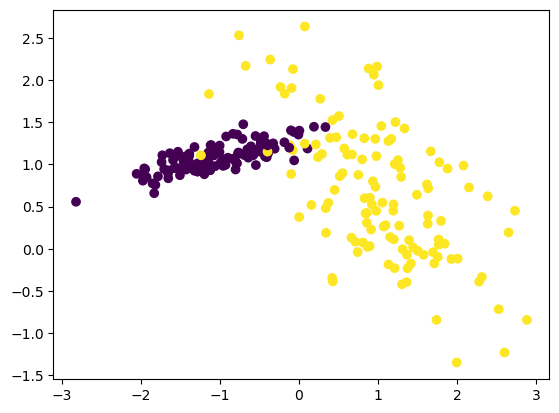

In [15]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [16]:
model = DTree()
model.fit(X_train, y_train)
preds = model.predict(X_test)

TypeError: cannot unpack non-iterable NoneType object

In [17]:
from Scratch.helpers.Evaluation import classification_stats
cm_args, metrics = classification_stats(preds, y_test)
metrics

ModuleNotFoundError: No module named 'Scratch'

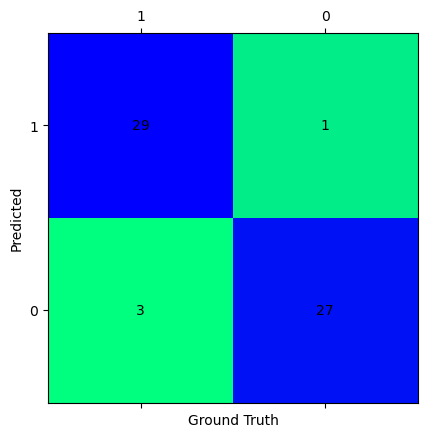

In [6]:
from Scratch.helpers.Evaluation import confusion_matrix
confusion_matrix(*cm_args)